Список столбцов в DataFrame:
Index(['Platform', 'Post ID', 'Post Type', 'Post Content', 'Post Timestamp',
       'Likes', 'Comments', 'Shares', 'Impressions', 'Reach',
       'Engagement Rate', 'Audience Age', 'Audience Gender',
       'Audience Location', 'Audience Interests', 'Campaign ID', 'Sentiment',
       'Influencer ID'],
      dtype='object')
Количество записей, где Impressions больше Reach: 80107

Проверка целостности данных:
Количество пропущенных значений в каждом столбце:
Platform                  0
Post ID                   0
Post Type                 0
Post Content              0
Post Timestamp            0
Likes                     0
Comments                  0
Shares                    0
Impressions               0
Reach                     0
Engagement Rate           0
Audience Age              0
Audience Gender           0
Audience Location         0
Audience Interests        0
Campaign ID           79868
Sentiment             50100
Influencer ID         90006
dtype:

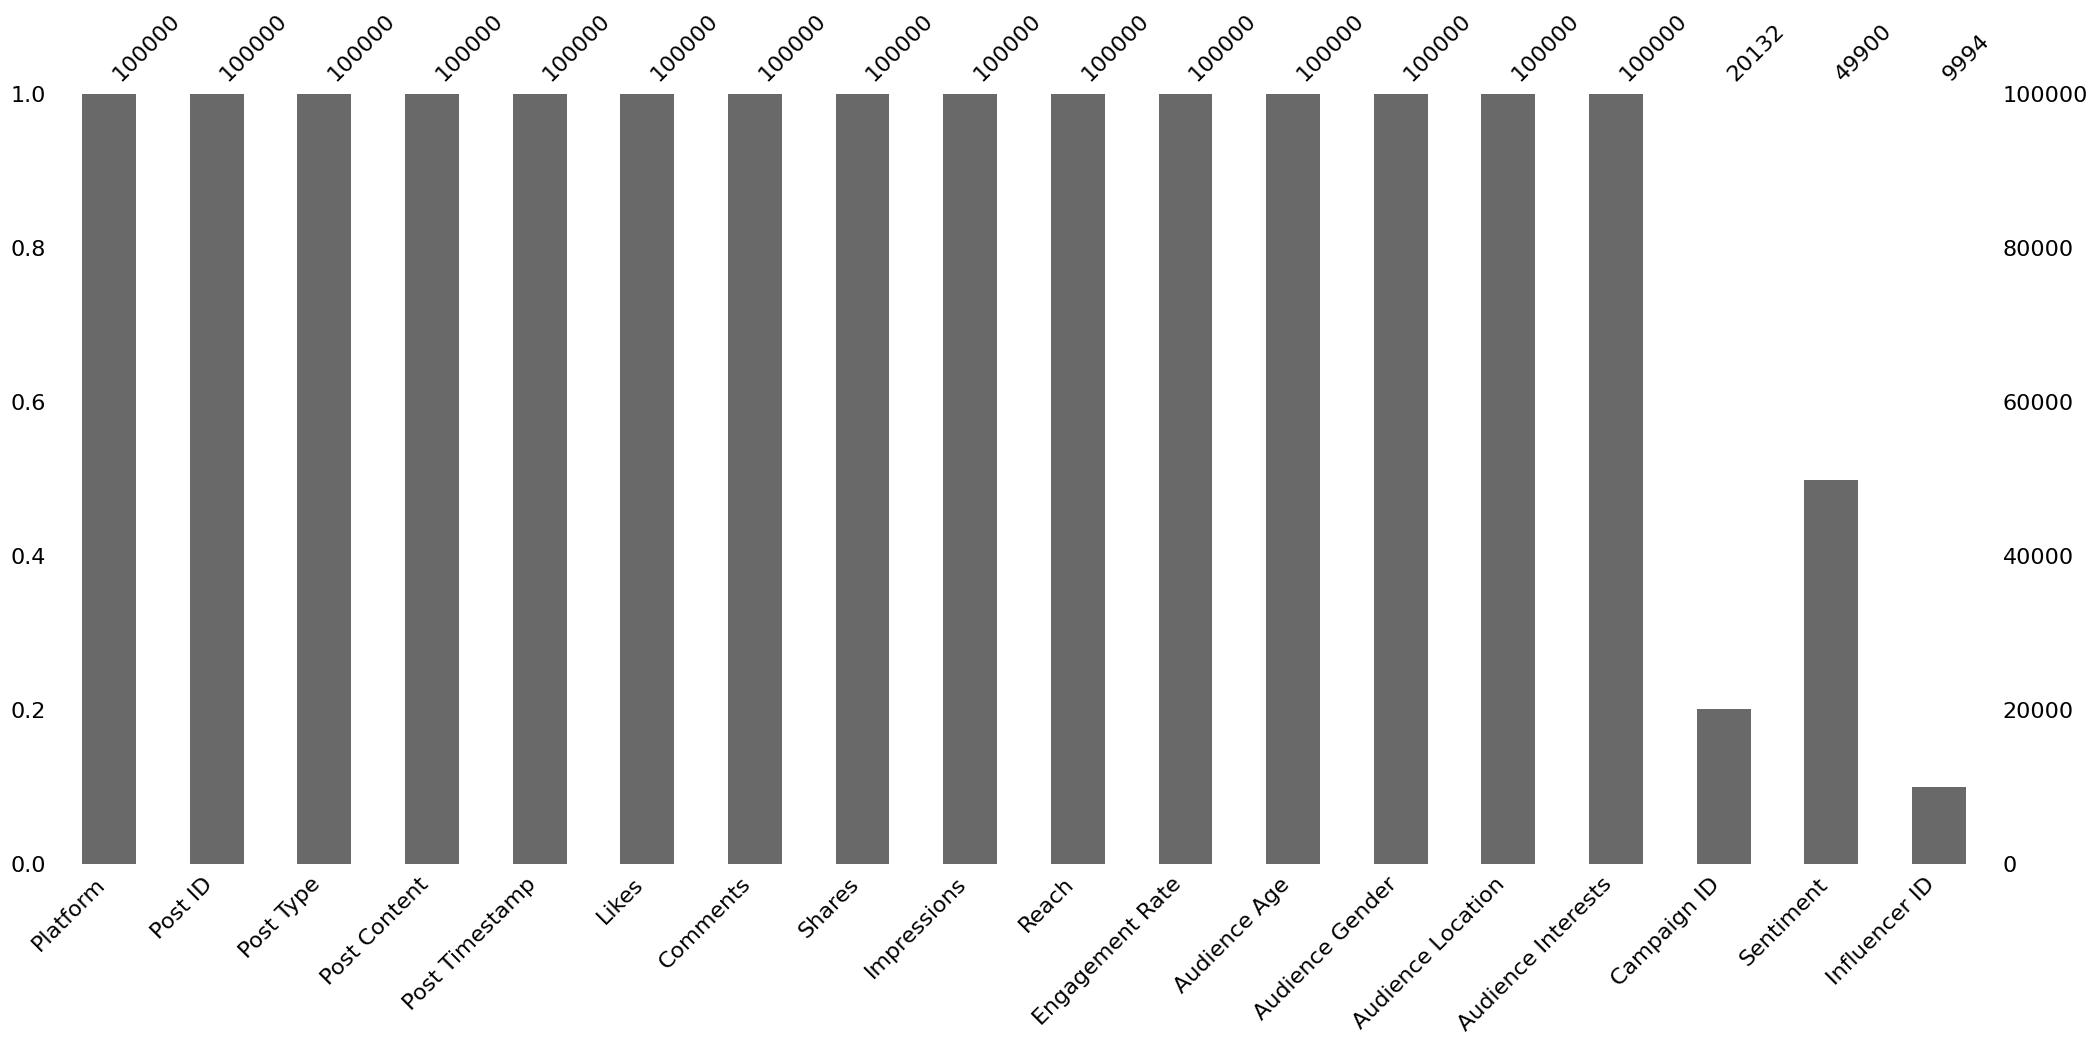

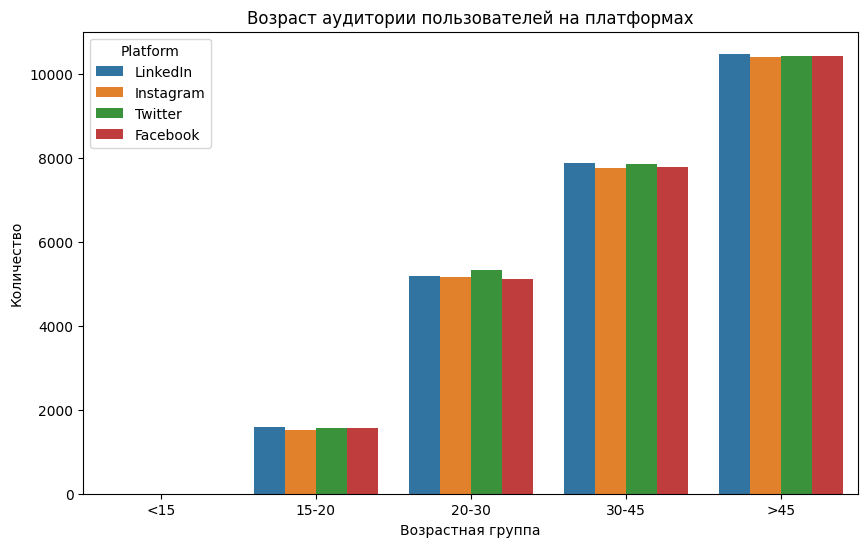

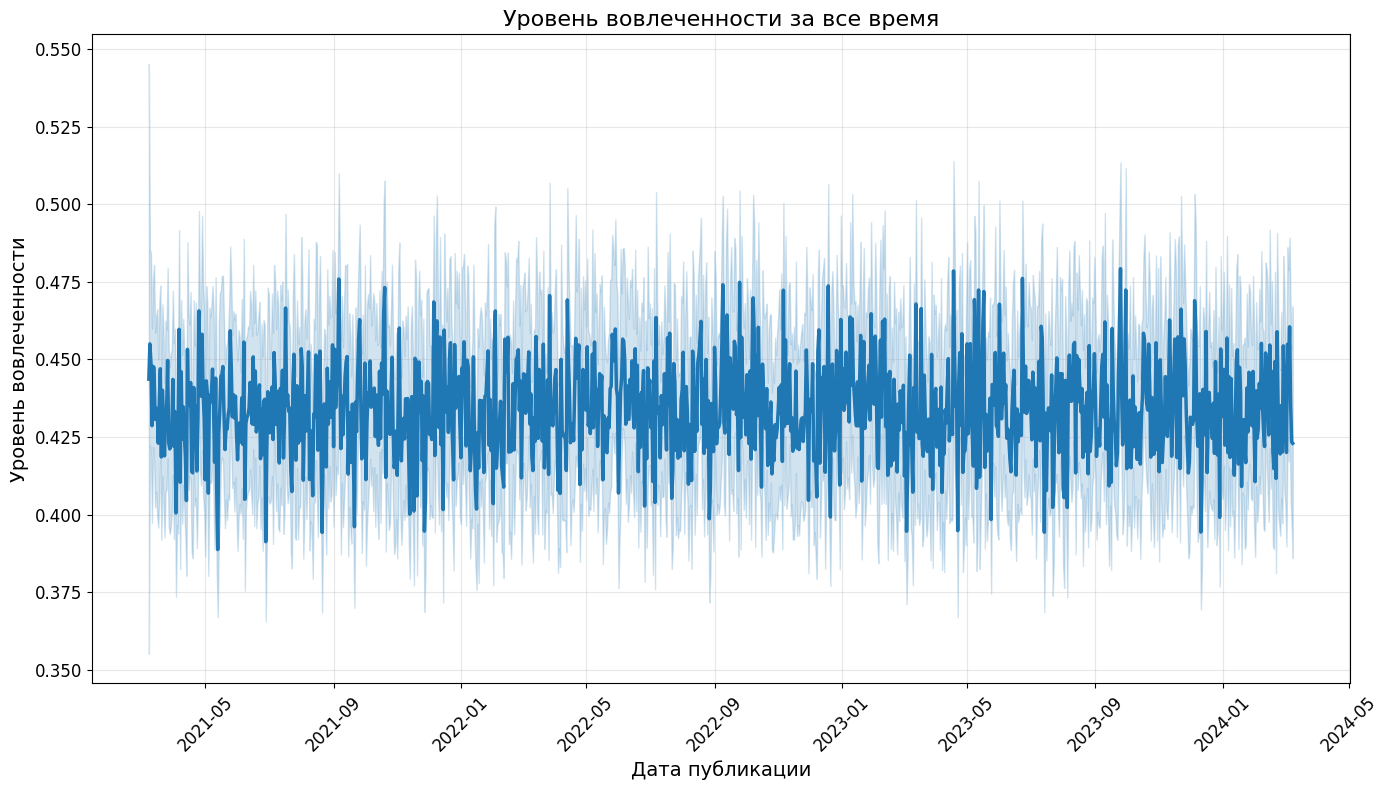

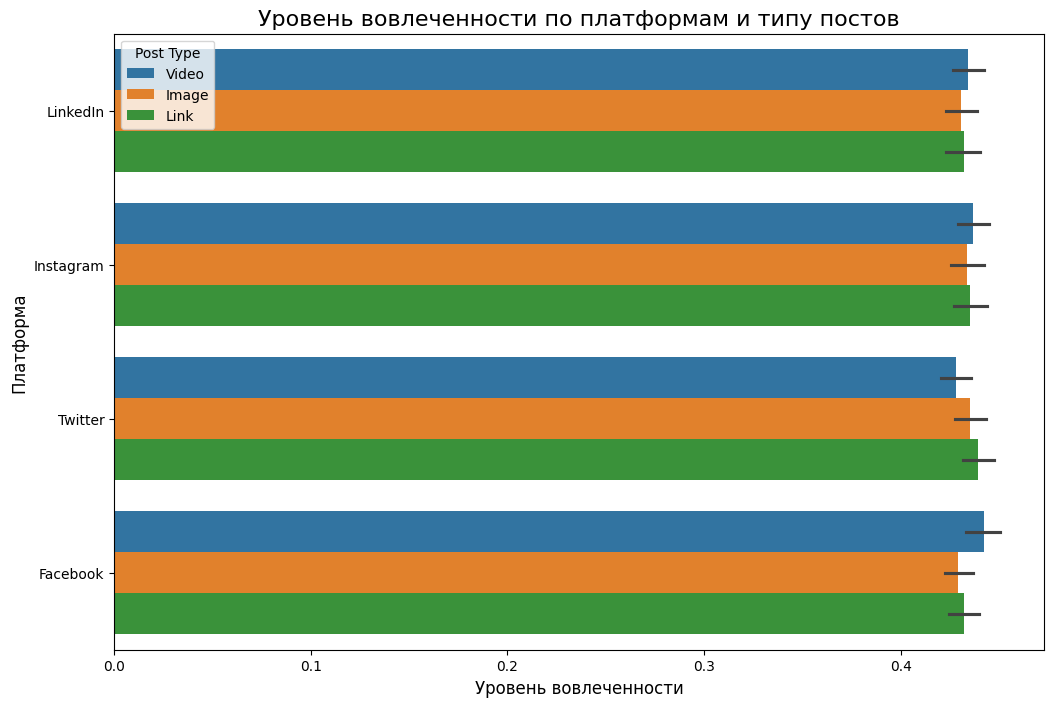

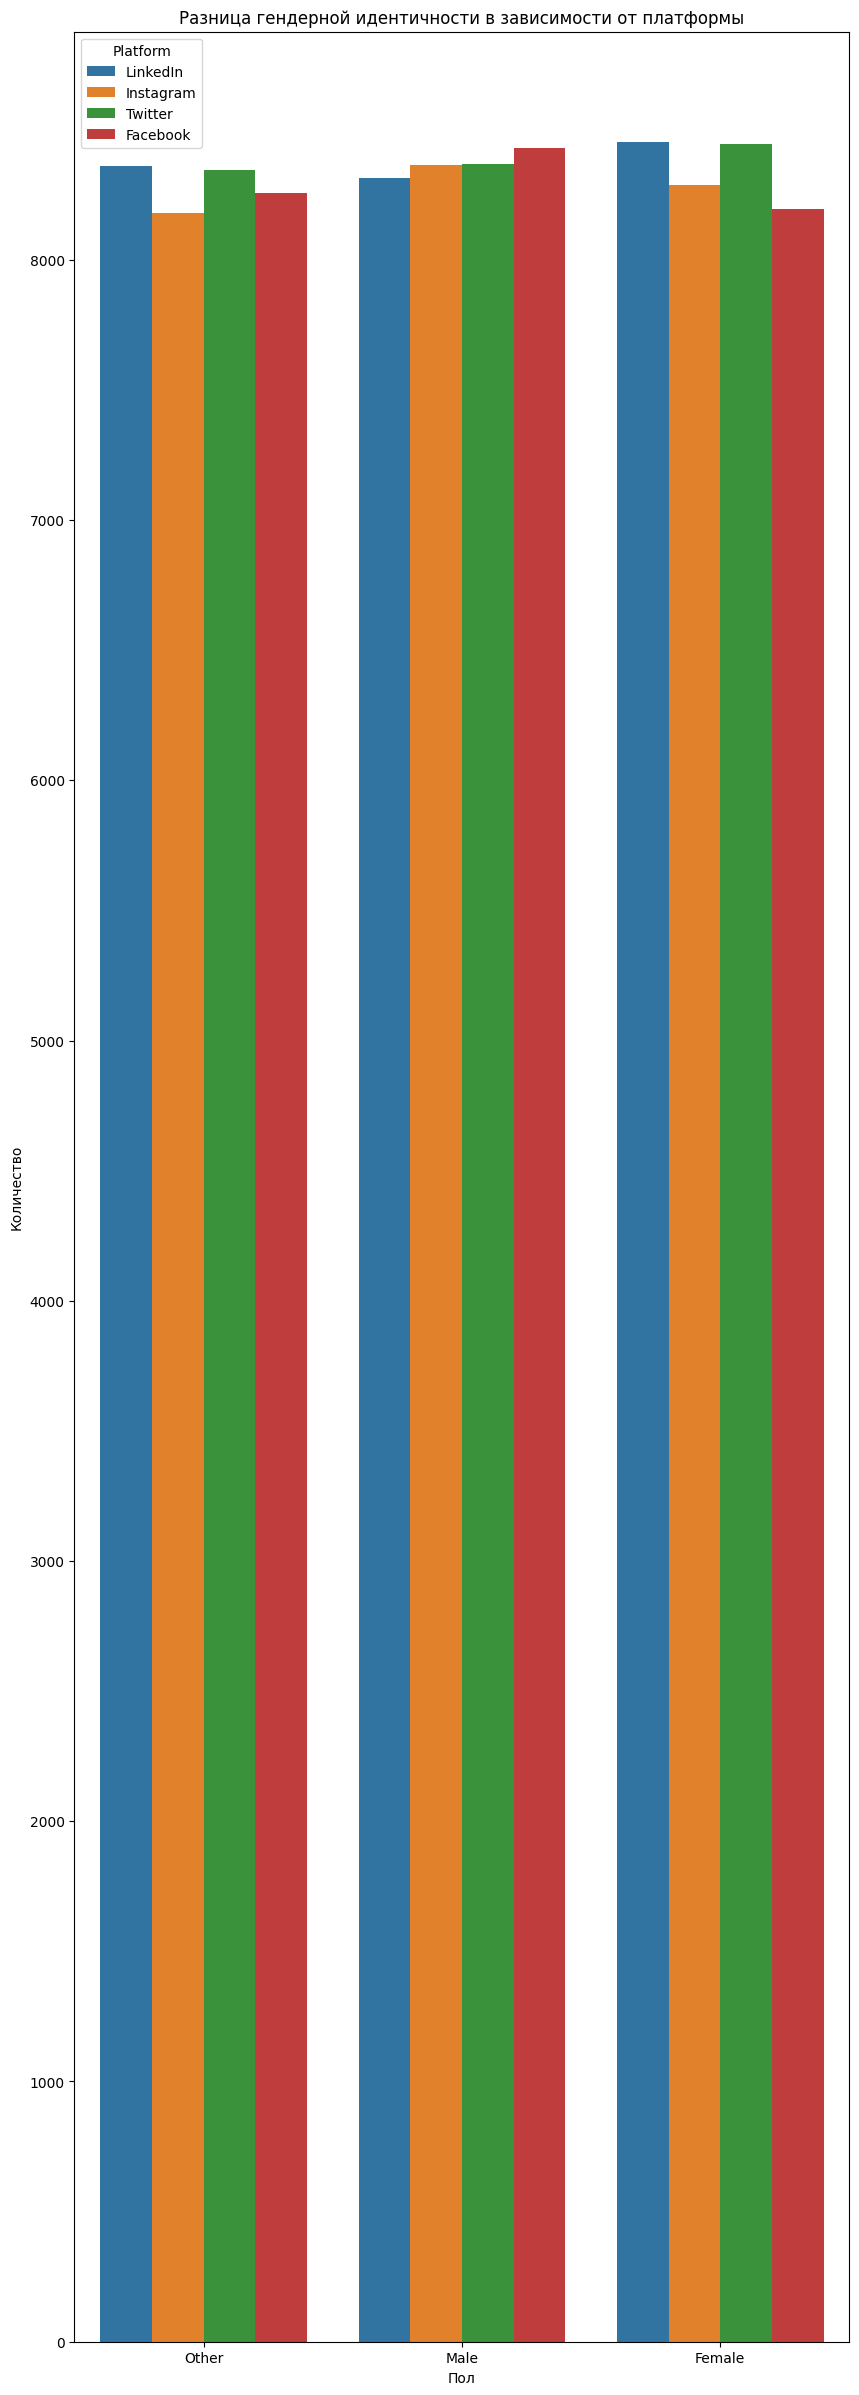

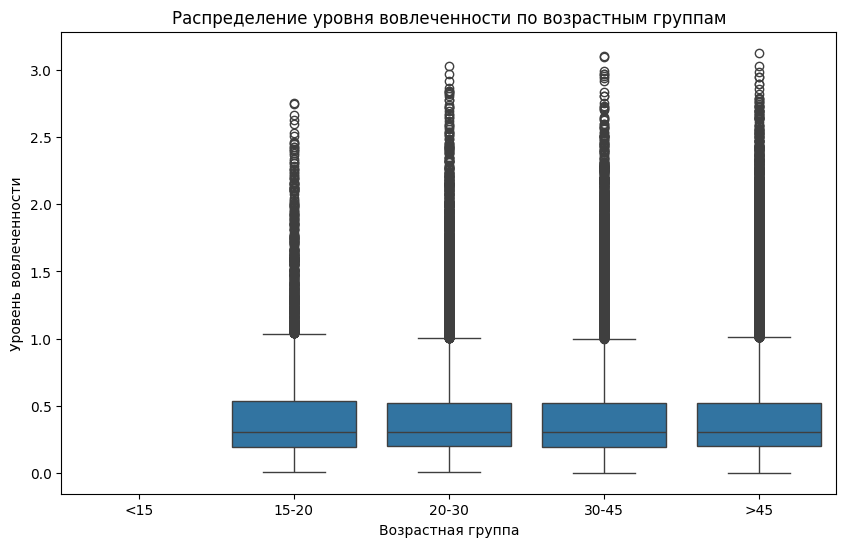

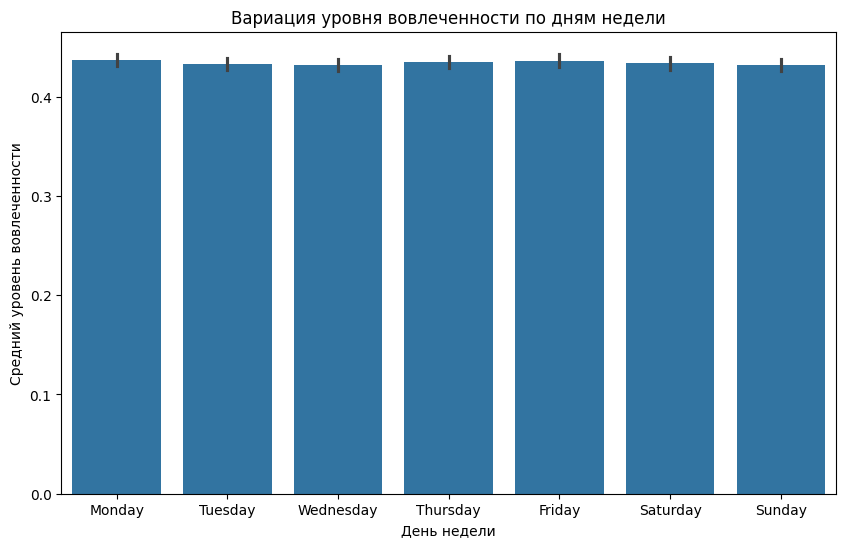

   Weekend and Weekday time_of_day  Engagement Rate
0               Friday       Вечер         0.446799
10            Saturday        Ночь         0.442322
17            Thursday        День         0.440203
7               Monday        Утро         0.439235
20             Tuesday       Вечер         0.438977
5               Monday        День         0.437807
6               Monday        Ночь         0.437370
1               Friday        День         0.435918
2               Friday        Ночь         0.435585
25           Wednesday        День         0.435545
19            Thursday        Утро         0.435218
13              Sunday        День         0.434763
12              Sunday       Вечер         0.434486
27           Wednesday        Утро         0.433809
18            Thursday        Ночь         0.433670
21             Tuesday        День         0.433609
26           Wednesday        Ночь         0.433205
4               Monday       Вечер         0.433160
9           

In [2]:
import pandas as pd  # Импорт библиотеки Pandas для работы с данными
import matplotlib.pyplot as plt  # Импорт библиотеки Matplotlib для построения графиков
import seaborn as sns  # Импорт библиотеки Seaborn для визуализации данных
import warnings  # Импорт модуля для управления предупреждениями
import missingno as msno  # Импорт библиотеки Missingno для анализа пропущенных данных
from datetime import datetime  # Импорт класса datetime для работы с датами и временем

# Игнорирование всех предупреждений
warnings.filterwarnings("ignore")

# Чтение данных из CSV-файла с указанием разделителя
data = pd.read_csv(r"C:\Users\HUAWEI\OneDrive\Документы\social_media_data.csv", sep=';')

# Вывод списка столбцов для диагностики
print("Список столбцов в DataFrame:")
print(data.columns)

# Удаление пробелов в названиях столбцов
data.columns = data.columns.str.strip()

# Проверка наличия необходимых столбцов с учетом возможных вариаций
required_columns = {
    'Impressions': ['Impressions', 'impressions', 'Impression', 'impression'],
    'Reach': ['Reach', 'reach'],
    'Likes': ['Likes', 'likes'],
    'Comments': ['Comments', 'comments'],
    'Shares': ['Shares', 'shares']
}

missing_columns = {}
for target, variations in required_columns.items():
    if not any(variation in data.columns for variation in variations):
        missing_columns[target] = variations

if missing_columns:
    print("Отсутствуют следующие столбцы:")
    for target, variations in missing_columns.items():
        print(f"{target} (возможные варианты: {', '.join(variations)})")
else:
    # Находим соответствующие столбцы в DataFrame
    column_mapping = {}
    for target, variations in required_columns.items():
        for variation in variations:
            if variation in data.columns:
                column_mapping[target] = variation
                break

# Добавляем новый столбец 'Engagement Rate' (Коэффициент вовлеченности)
data['Engagement Rate'] = (
    data[column_mapping['Likes']] +
    data[column_mapping['Comments']] +
    data[column_mapping['Shares']]
) / data[column_mapping['Reach']]

# Проверка целостности данных
print("Количество записей, где Impressions больше Reach:",
      sum(data[column_mapping['Impressions']] > data[column_mapping['Reach']]))

# Дополнительные проверки
print("\nПроверка целостности данных:")
print("Количество пропущенных значений в каждом столбце:")
print(data.isnull().sum())

print("\nСводная статистика:")
print(data.describe())

# Вывод первых нескольких строк данных для проверки
print("\nПервые несколько строк набора данных:")
print(data.head())

# Визуализация пропущенных значений
msno.bar(data)

# Преобразуем столбец 'Post Timestamp' в формат datetime
data['Post Timestamp'] = pd.to_datetime(data['Post Timestamp'], errors='coerce')

# Разделяем аудиторию по возрасту
data['Age Group'] = pd.cut(
    data['Audience Age'],
    bins=[5, 15, 20, 30, 45, float('inf')],
    labels=['<15', '15-20', '20-30', '30-45', '>45']
)

# Преобразование столбца 'Post Timestamp' в дату и время
data['Post Date'] = data['Post Timestamp'].dt.date
data['Post Time'] = data['Post Timestamp'].dt.time

# Разделение на дату и время публикации
data['Post Date'] = data['Post Timestamp'].dt.date
data['Post Time'] = data['Post Timestamp'].dt.time

# Временной анализ
data['Weekday Type'] = data['Post Timestamp'].dt.day_name()
data['Time Period'] = pd.cut(
    data['Post Timestamp'].dt.hour,
    bins=[0, 6, 12, 18, 24],
    labels=['Ночь', 'Утро', 'После полудня', 'Вечер']
)

# Анализ настроений
data['Sentiment'].fillna('Mixed Sentiment', inplace=True)

# Географический анализ
country_continent_mapping = {
    'Country1': 'Continent1',
    'Country2': 'Continent2',
    'Country3': 'Continent3'
}
data['Audience Continent'] = data['Audience Location'].map(country_continent_mapping)

# Визуализация распределения возраста аудитории по платформам
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age Group', hue='Platform')
plt.title('Возраст аудитории пользователей на платформах')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество')
plt.show()

# Удаление пропущенных значений в столбце 'Post Date'
data = data.dropna(subset=['Post Date'])

# Сглаживаем данные
data['Smoothed Engagement Rate'] = data['Engagement Rate'].rolling(window=7, min_periods=1).mean()

# Визуализируем сглаженный уровень вовлеченности
plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='Post Date', y='Smoothed Engagement Rate', linewidth=2.5)
plt.title('Уровень вовлеченности за все время', fontsize=16)
plt.xlabel('Дата публикации', fontsize=14)
plt.ylabel('Уровень вовлеченности', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Визуализация уровня вовлеченности по платформам и типу постов
plt.figure(figsize=(12, 8))
sns.barplot(x='Engagement Rate', y='Platform', hue='Post Type', data=data)
plt.title('Уровень вовлеченности по платформам и типу постов', fontsize=16)
plt.xlabel('Уровень вовлеченности', fontsize=12)
plt.ylabel('Платформа', fontsize=12)
plt.show()

# Визуализация распределения гендерной идентичности по платформам
plt.figure(figsize=(10, 30))
sns.countplot(data=data, x='Audience Gender', hue='Platform')
plt.title('Разница гендерной идентичности в зависимости от платформы')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

# Визуализация распределения уровня вовлеченности по возрастным группам
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Age Group', y='Engagement Rate')
plt.title('Распределение уровня вовлеченности по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Уровень вовлеченности')
plt.show()

# Визуализация вариации уровня вовлеченности по дням недели
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Weekday Type', y='Engagement Rate', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.title('Вариация уровня вовлеченности по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средний уровень вовлеченности')
plt.show()

def time_date_split(dataset, col):
    """
    Разделяет заданный столбец даты и времени на отдельные столбцы даты и времени,
    а также добавляет названия месяца и дня недели.

    Параметры:
    dataset (pd.DataFrame): DataFrame, содержащий данные.
    col (str): Название столбца даты и времени для разделения.

    Функция добавляет следующие новые столбцы в набор данных:
    - 'Date': Извлеченная часть даты из столбца даты и времени.
    - 'Time': Извлеченная часть времени, округленная до ближайшего часа.
    - 'Weekend and Weekday': Название дня недели.
    - 'Hour': Час из столбца даты и времени.
    - 'Year': Год из столбца даты и времени.
    """
    dataset['Date'] = pd.to_datetime(dataset[col]).dt.date
    dataset['Time'] = pd.to_datetime(dataset[col]).dt.round('h').dt.time
    dataset['Weekend and Weekday'] = pd.to_datetime(dataset[col]).dt.day_name()
    dataset['Hour'] = pd.to_datetime(dataset[col]).dt.hour
    dataset['Year'] = pd.to_datetime(dataset[col]).dt.year

time_date_split(data, 'Post Timestamp')

def categorize_time(time):
    """
    Категоризирует заданное время в одну из четырех временных периодов: Утро, День, Вечер или Ночь.

    Параметры:
    time (datetime.time): Время для категоризации.

    Возвращает:
    str: Категория временного периода ('Утро', 'День', 'Вечер' или 'Ночь').

    Временные периоды определены как:
    - Утро: 06:00:00 до 11:59:59
    - День: 12:00:00 до 16:59:59
    - Вечер: 17:00:00 до 20:59:59
    - Ночь: 21:00:00 до 05:59:59
    """
    if datetime.strptime('06:00:00', '%H:%M:%S').time() <= time < datetime.strptime('12:00:00', '%H:%M:%S').time():
        return 'Утро'
    elif datetime.strptime('12:00:00', '%H:%M:%S').time() <= time < datetime.strptime('17:00:00', '%H:%M:%S').time():
        return 'День'
    elif datetime.strptime('17:00:00', '%H:%M:%S').time() <= time < datetime.strptime('21:00:00', '%H:%M:%S').time():
        return 'Вечер'
    else:
        return 'Ночь'

data['time_of_day'] = data['Time'].apply(categorize_time)

# Группировка по 'Weekend and Weekday' и 'time_of_day' для расчета среднего уровня вовлеченности
day_engagement = data.groupby(['Weekend and Weekday', 'time_of_day'])['Engagement Rate'].mean().reset_index()

# Сортировка по 'Engagement Rate' в порядке убывания
day_engagement = day_engagement.sort_values(by='Engagement Rate', ascending=False)

# Вывод результата
print(day_engagement)